In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

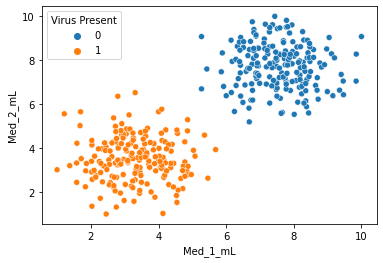

In [5]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

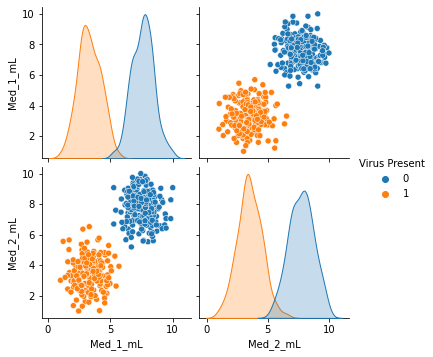

In [7]:
sns.pairplot(df, hue='Virus Present')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve, mean_absolute_error, mean_squared_error

In [19]:
model = SVC(kernel='rbf', C=1)

In [15]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [20]:
model.fit(X, y)

SVC(C=1)

In [21]:
from svm_margin_plot import plot_svm_boundary

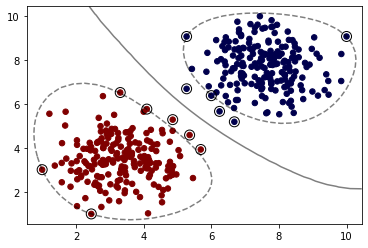

In [22]:
plot_svm_boundary(model, X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [24]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
param_grid = {'kernel': ['rbf', 'linear', 'poly'], 'C': [0.01,0.1,1,10], 'gamma':['scale', 'auto'], 'degree': [2,3]}

In [26]:
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=2)

In [27]:
grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .........C=0.01, degree=2, gamma=scale

[CV] END .............C=1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .............C=1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ............C=1, de

GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=2)

In [28]:
grid.best_estimator_.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
pred = grid.predict(scaled_X_test)

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



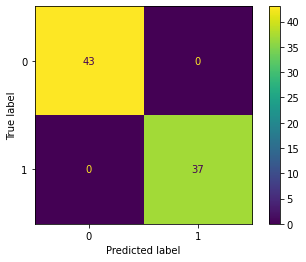

In [31]:
plot_confusion_matrix(grid, scaled_X_test, y_test)